In [ ]:
# configration of path of kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d myrios/cost-of-living-index-by-country-by-number-2024

Dataset URL: https://www.kaggle.com/datasets/myrios/cost-of-living-index-by-country-by-number-2024
License(s): other
  0% 0.00/2.83k [00:00<?, ?B/s]
100% 2.83k/2.83k [00:00<00:00, 3.73MB/s]


In [ ]:
from zipfile import ZipFile
dataset='/content/cost-of-living-index-by-country-by-number-2024.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Successfully File Extracted')

Successfully File Extracted


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
data = pd.read_csv('/content/Cost_of_Living_Index_by_Country_2024.csv')
data.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [ ]:
data.shape

(121, 8)

In [ ]:
data[data.drop(columns=['Country']).columns] = data[data.drop(columns=['Country']).columns].astype(int)

<Axes: >

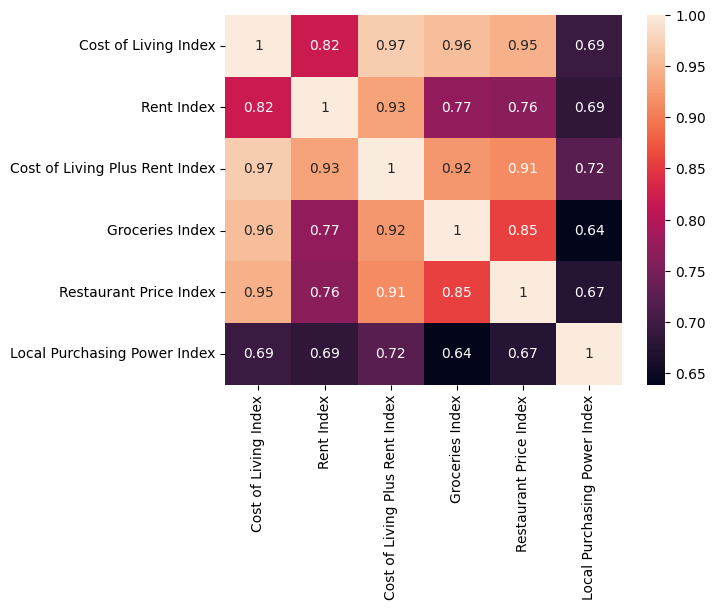

In [ ]:
sns.heatmap(data.drop(columns=['Rank','Country']).corr(),annot=True)

<Axes: title={'center': 'All Countries Living Index Histplot'}, ylabel='Count'>

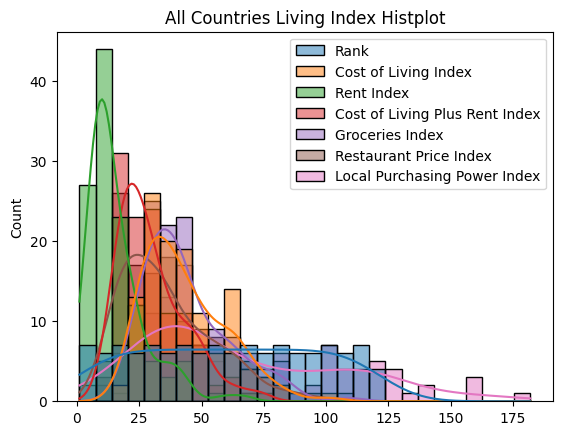

In [ ]:
plt.title('All Countries Living Index Histplot')
sns.histplot(data=data,kde=True)

##**Hypothesis Testing**

**Null Hypothesis (H0):** There is no significant difference in the Cost of Living Index between countries with high and low Local Purchasing Power Index.

In [ ]:
group1 = data[data['Local Purchasing Power Index'] > data['Local Purchasing Power Index'].median()]['Cost of Living Index']
group2 = data[data['Local Purchasing Power Index'] <= data['Local Purchasing Power Index'].median()]['Cost of Living Index']
t_statistic, p_value = stats.ttest_ind(group1, group2)

In [ ]:
alpha = stats.t.sf(abs(t_statistic), data.shape[0])

In [ ]:
print(alpha)
print(p_value)

7.31593130919047e-14
1.6056656847187224e-13


**Result:** Because of p_value < alpha then we reject H0. There is a statistical significance difference in the 'Cost of Living Index' between countries with high and low 'Local Purchasing Power Index'.